<a href="https://colab.research.google.com/github/kadamprasad13/Emotion_Based_Movie_Recommendation./blob/main/Time_series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#start

In [1]:
import os
os.environ["kaggle_config_dir"]='/content'
!kaggle datasets download -d kprasad13/time-series
! unzip \*.zip && rm*.zip

Dataset URL: https://www.kaggle.com/datasets/kprasad13/time-series
License(s): unknown
  0% 0.00/3.06M [00:00<?, ?B/s]
100% 3.06M/3.06M [00:00<00:00, 80.8MB/s]
Archive:  time-series.zip
  inflating: train.csv               
/bin/bash: line 1: rm*.zip: command not found


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load data
data = pd.read_csv('/content/train.csv', parse_dates=['date'])
data['sales'] = data['sales'].astype(float)
data

,date,store,item,sales
0,2013-01-01,1,1,13.0
1,2013-01-02,1,1,11.0
2,2013-01-03,1,1,14.0
3,2013-01-04,1,1,13.0
4,2013-01-05,1,1,10.0
...,...,...,...,...
912995,2017-12-27,10,50,63.0
912996,2017-12-28,10,50,59.0
912997,2017-12-29,10,50,74.0
912998,2017-12-30,10,50,62.0


**Exploratory Data Analysis**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 27.9 MB


In [4]:
data.describe()

,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000
std,NaN,2.872283,14.430878,28.801144


In [5]:
unique_values = data.nunique()
print(unique_values)


date     1826
store      10
item       50
sales     213
dtype: int64


**Sales trends over time**

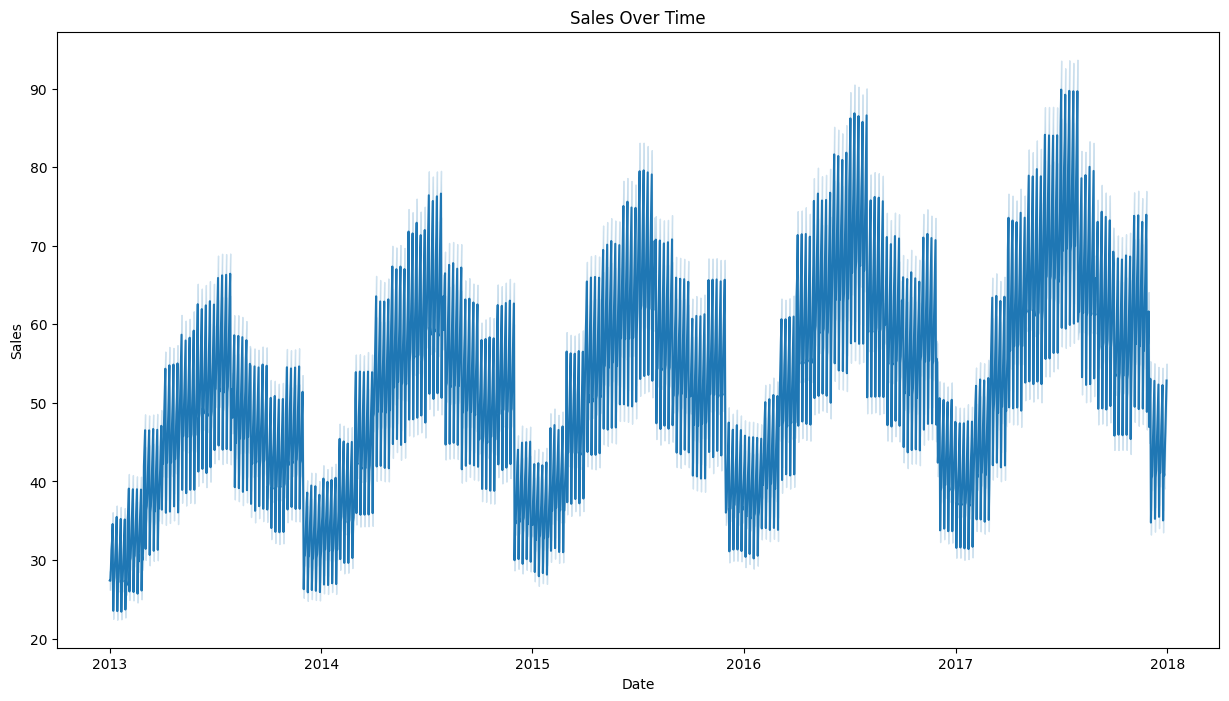

In [6]:
data['date'] = pd.to_datetime(data['date'])

plt.figure(figsize=(15, 8))
sns.lineplot(data=data, x='date', y='sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


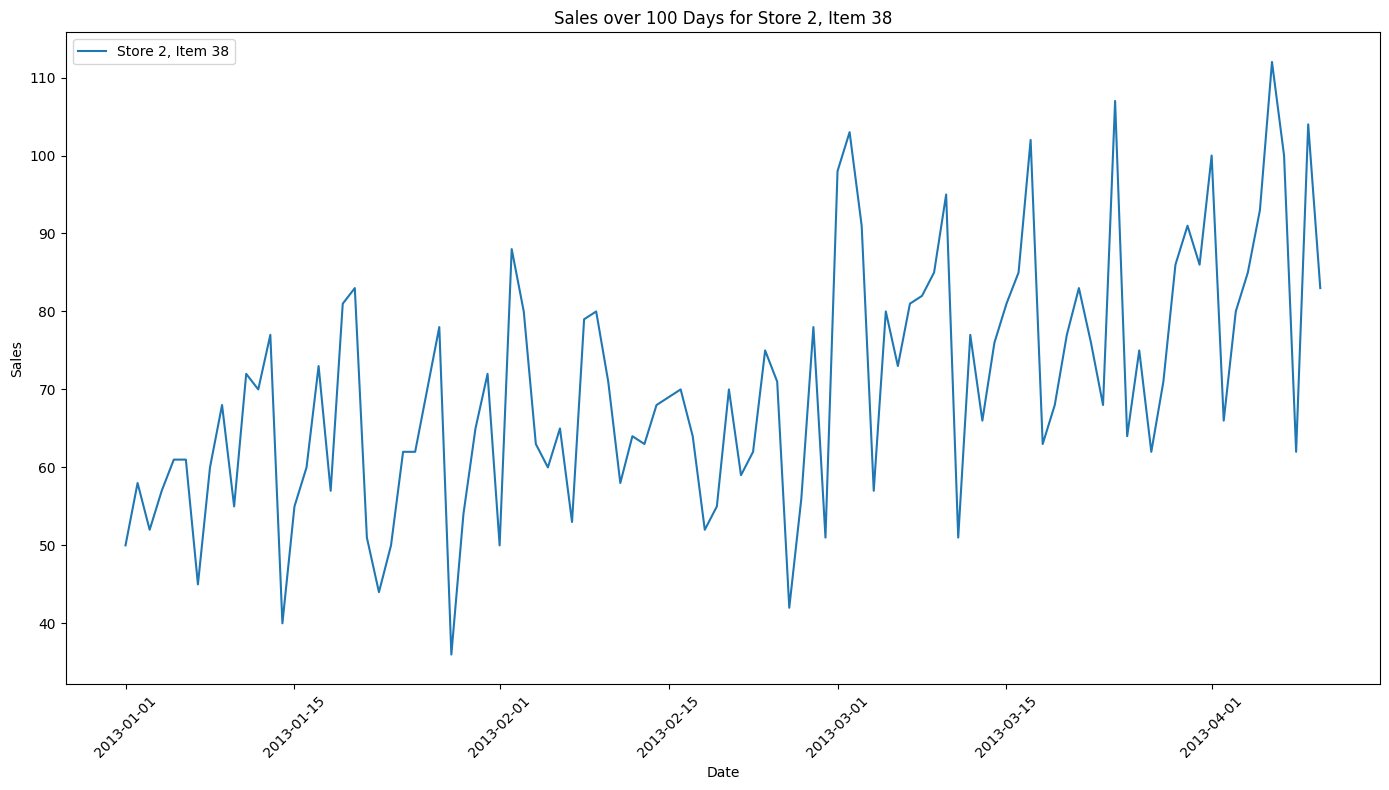

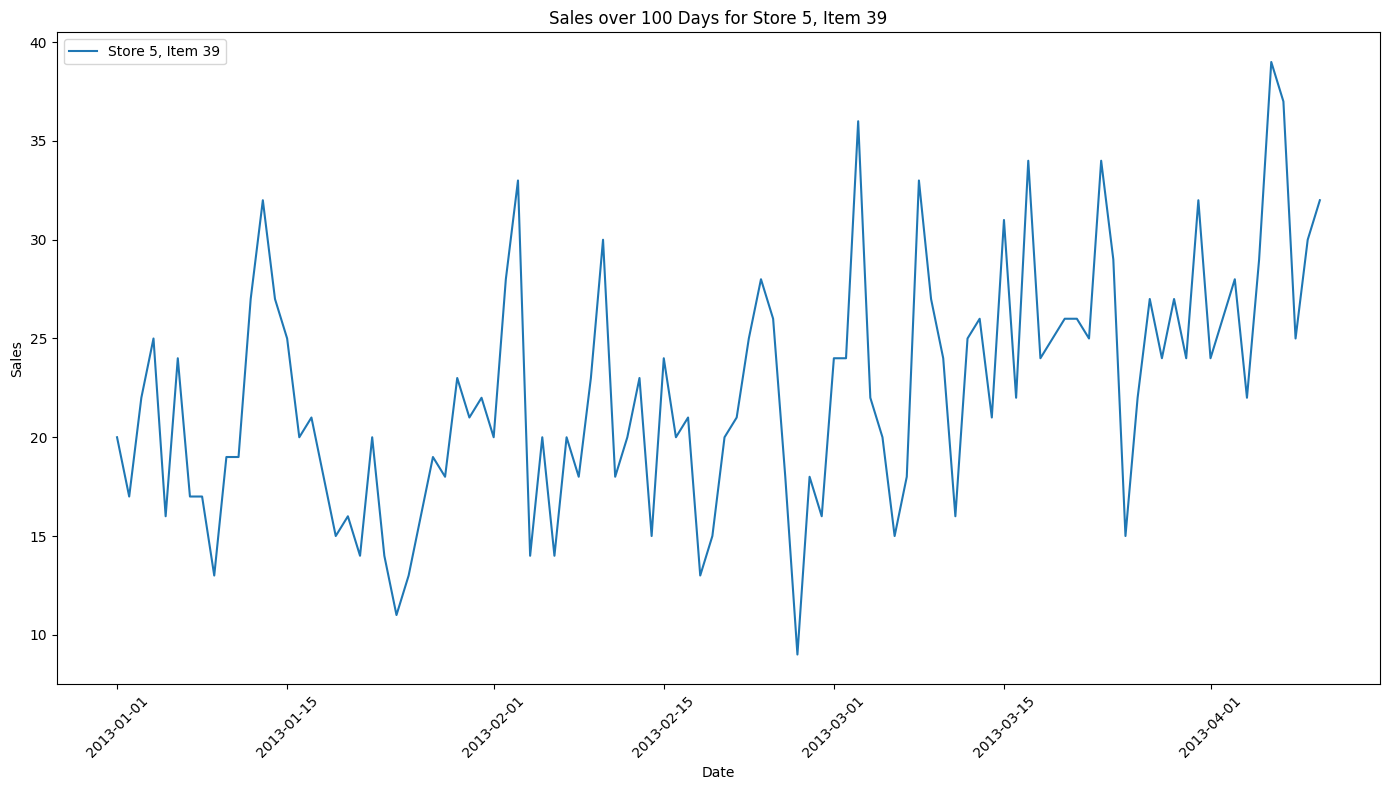

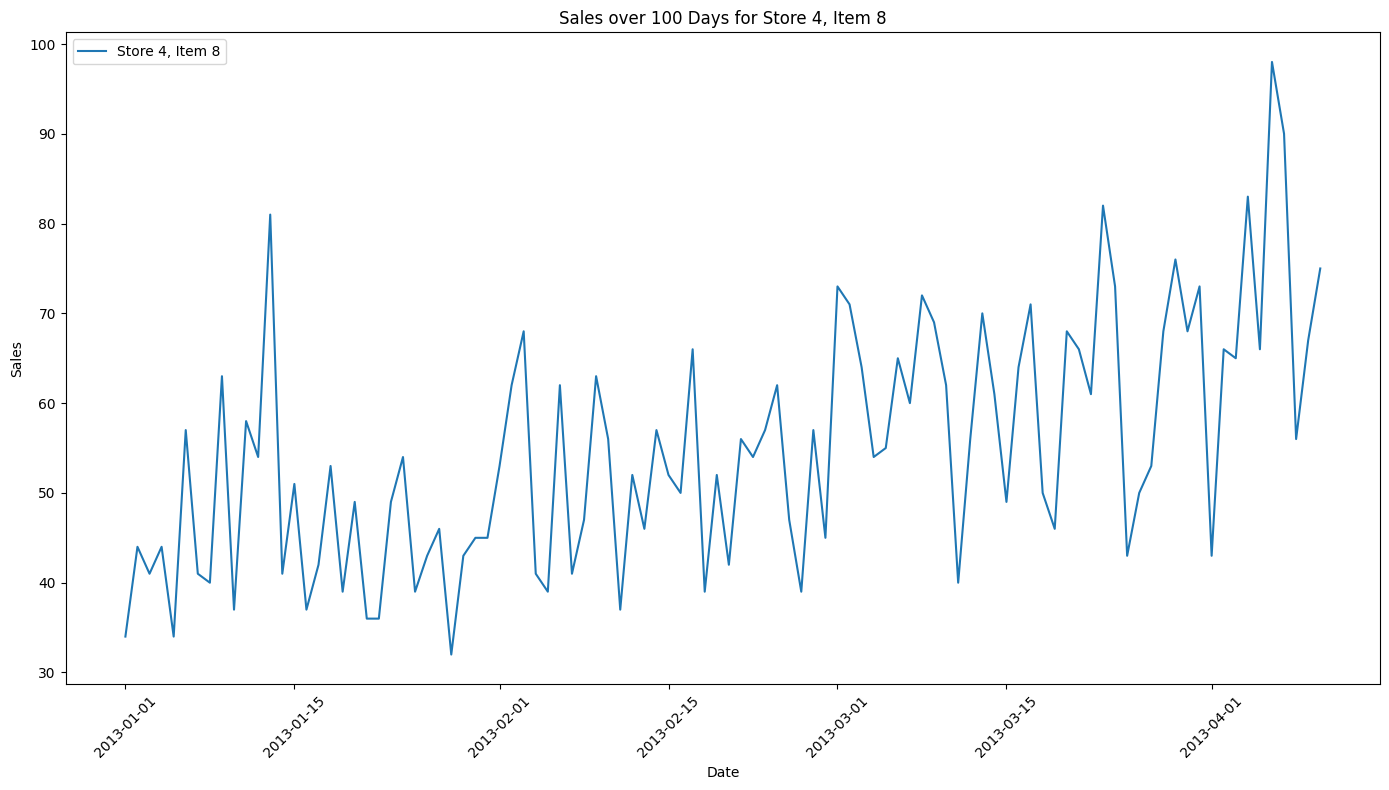

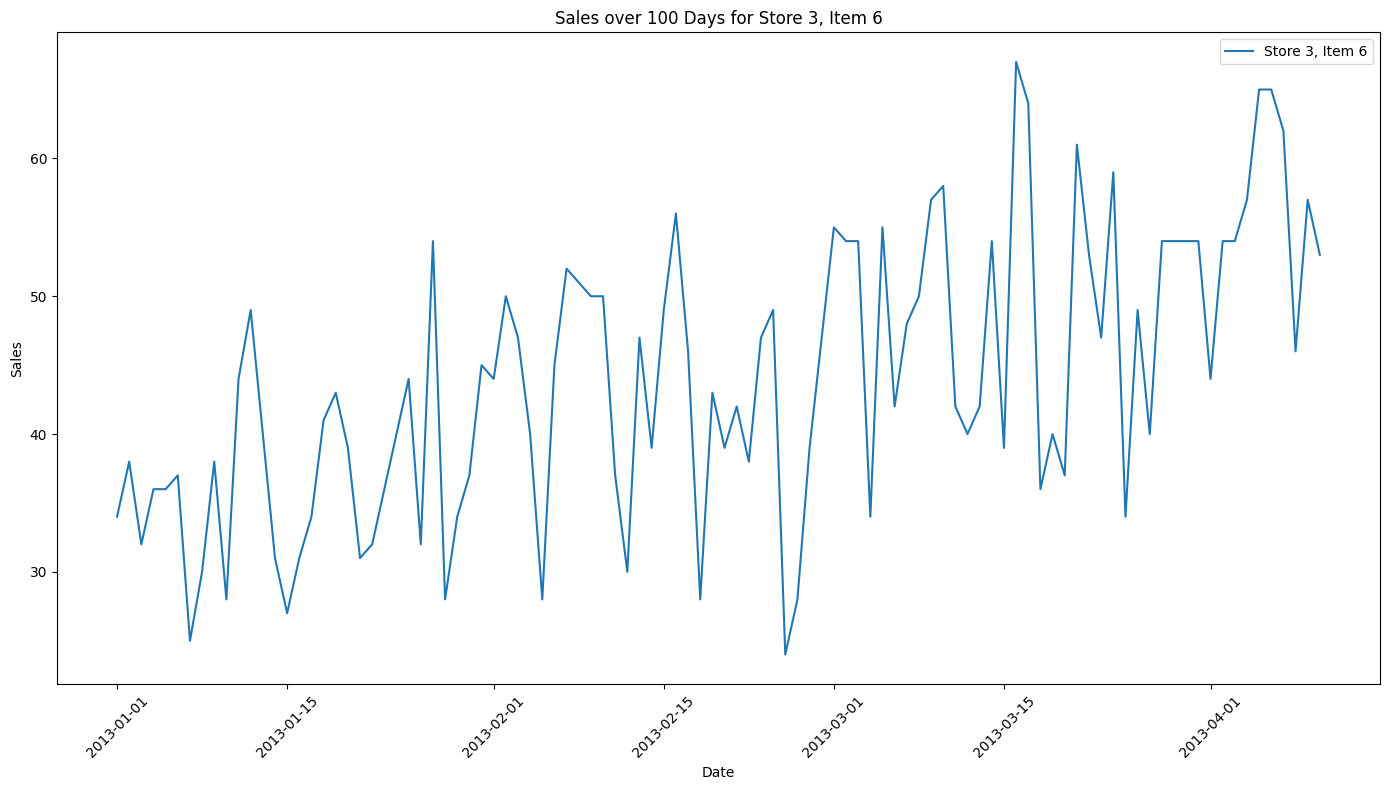

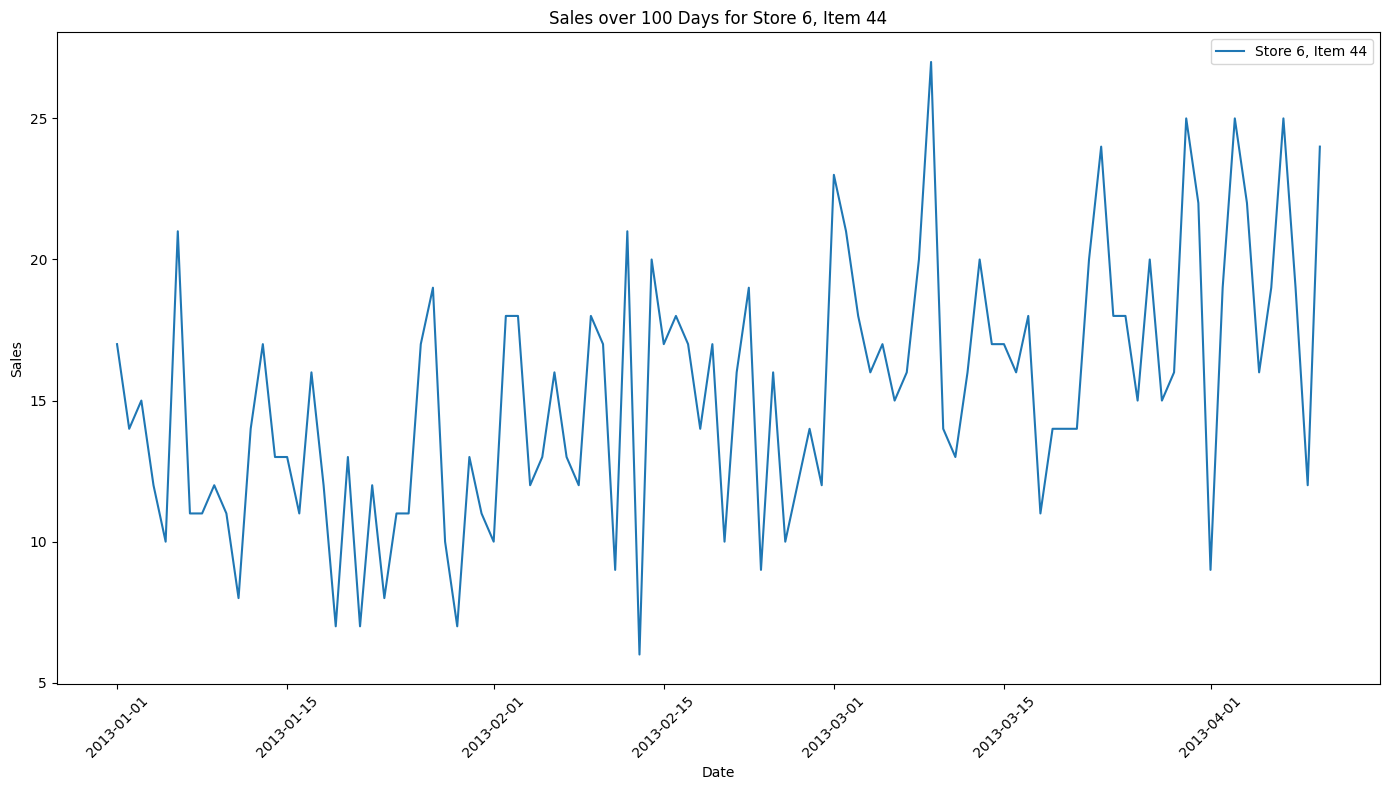

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random

def plot_sales(df, store, item, num_days=100):
    filtered_data = df[(df['store'] == store) & (df['item'] == item)]

    filtered_data = filtered_data.sort_values(by='date')

    filtered_data = filtered_data.head(num_days)

    # Plot sales
    plt.figure(figsize=(14, 8))
    plt.plot(filtered_data['date'], filtered_data['sales'], label=f'Store {store}, Item {item}')

    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title(f'Sales over {num_days} Days for Store {store}, Item {item}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

num_combinations = 5
stores = data['store'].unique()
items = data['item'].unique()

random_combinations = [(random.choice(stores), random.choice(items)) for _ in range(num_combinations)]

for store, item in random_combinations:
    plot_sales(data, store, item)


**Sales Distribution by Store and Item**

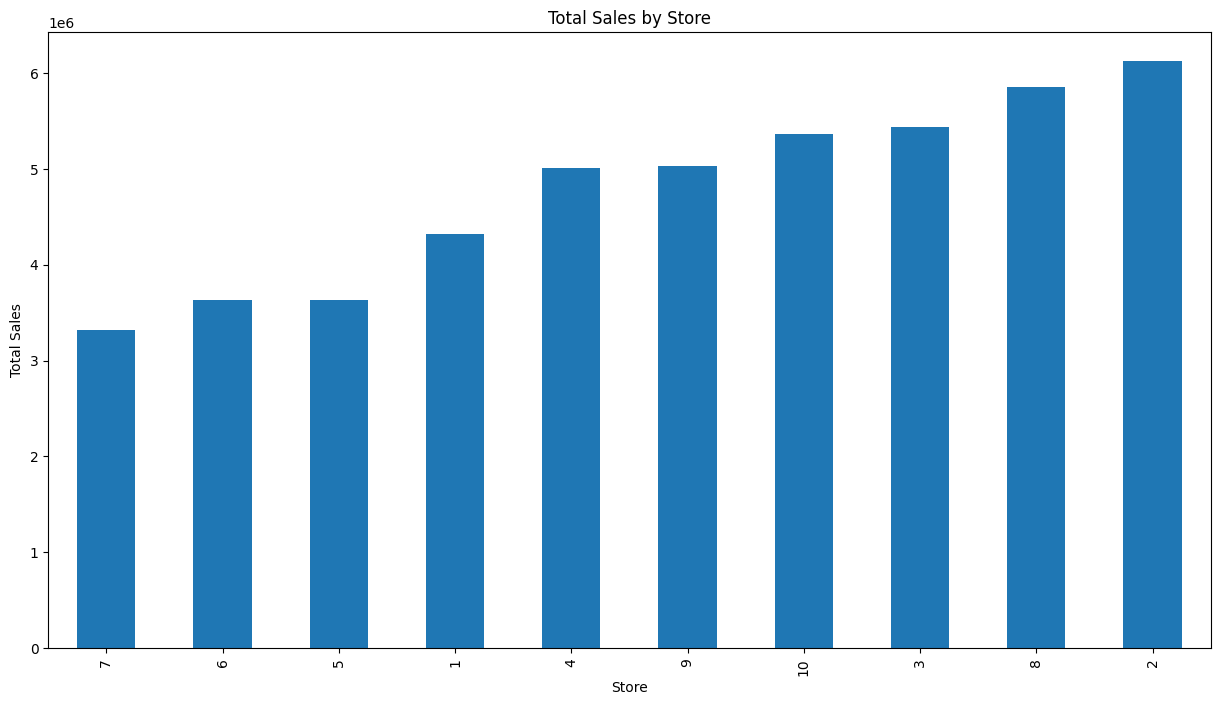

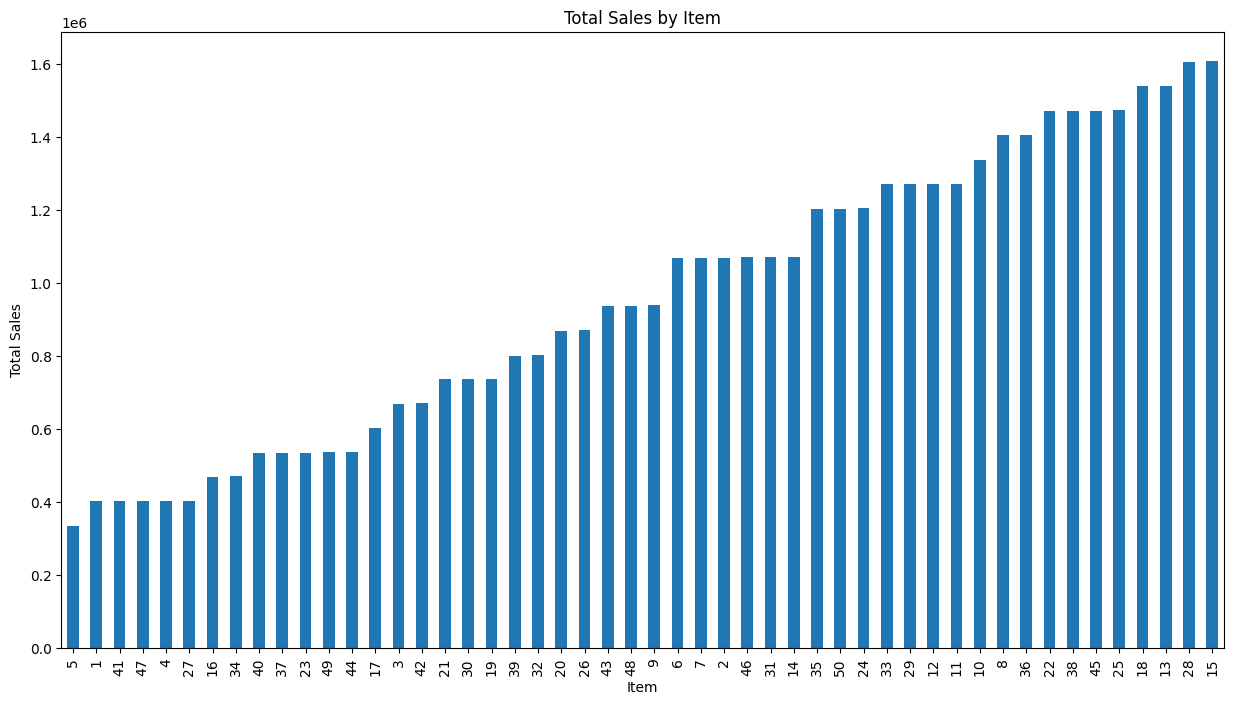

In [8]:
sales_by_store = data.groupby('store')['sales'].sum().sort_values()
sales_by_store.plot(kind='bar', figsize=(15, 8), title='Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

sales_by_item = data.groupby('item')['sales'].sum().sort_values()
sales_by_item.plot(kind='bar', figsize=(15, 8), title='Total Sales by Item')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.show()


In [9]:
total_sales = data.groupby('date')['sales'].sum().reset_index()
total_sales

,date,sales
0,2013-01-01,13696.0
1,2013-01-02,13678.0
2,2013-01-03,14488.0
3,2013-01-04,15677.0
4,2013-01-05,16237.0
...,...,...
1821,2017-12-27,20378.0
1822,2017-12-28,21885.0
1823,2017-12-29,23535.0
1824,2017-12-30,24988.0


<Figure size 1500x800 with 0 Axes>

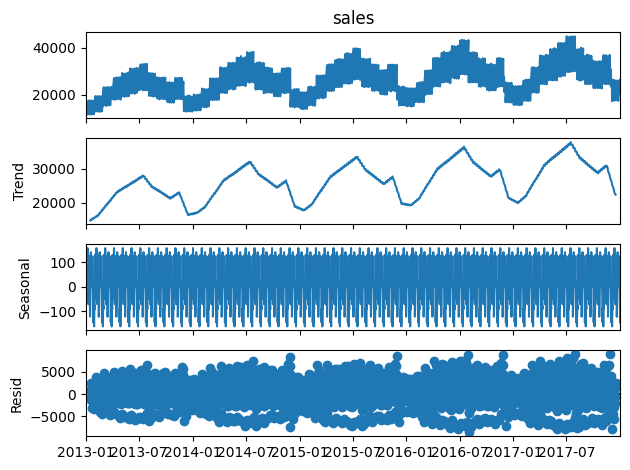

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

total_sales.set_index('date', inplace=True)
result = seasonal_decompose(total_sales['sales'], model='additive', period=30)  # Change period based on data frequency

plt.figure(figsize=(15, 8))
result.plot()
plt.show()


(-3.0602441187013483, 0.029638649268843572, 21, 1804, {'1%': -3.4339800605797155, '5%': -2.8631434696839992, '10%': -2.5676236347535166}, 29234.283115162158)


<Figure size 1200x600 with 0 Axes>

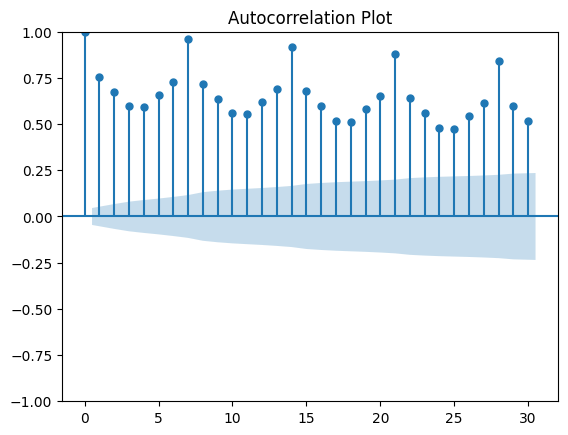

<Figure size 1200x600 with 0 Axes>

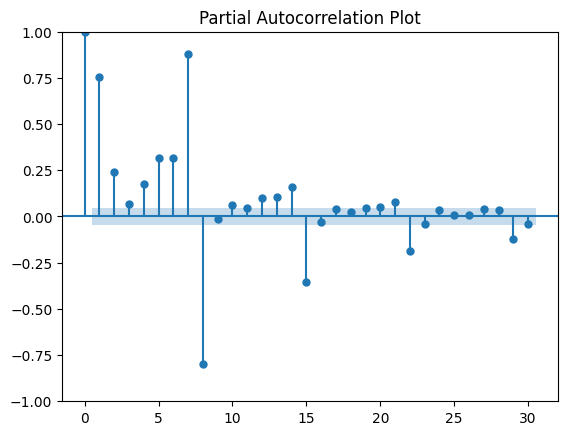

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
result=adfuller(total_sales['sales'])
print(result)
plt.figure(figsize=(12, 6))
plot_acf(total_sales['sales'], lags=30)
plt.title('Autocorrelation Plot')
plt.show()
plt.figure(figsize=(12, 6))
plot_pacf(total_sales['sales'], lags=30)
plt.title('Partial Autocorrelation Plot')
plt.show()


#XgBoost Model

Importing the data and creating new date-time features. we are also creating new lag features and rolling features such as mean and std. which will capture the temporal patterns from the data. Given the cyclic nature of date-time features. we are scaling them by using cyclic function such as sin and cos.

In [12]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')

data = pd.read_csv('/content/train.csv', parse_dates=['date'])
data['sales'] = data['sales'].astype(float)

def create_date_features(df):
    df['day_of_week'] = df['date'].dt.dayofweek
    df['day_of_month'] = df['date'].dt.day
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    return df

item_sales = data.groupby(['date', 'store', 'item'])['sales'].sum().reset_index()
item_sales = create_date_features(item_sales)

def add_cyclic_features(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / max_val)
    return df

def add_lag_rolling_features(df, lag_days, window_days):
    for lag in lag_days:
        df[f'sales_lag_{lag}'] = df.groupby(['store', 'item'])['sales'].shift(lag)
    for window in window_days:
        df[f'sales_roll_mean_{window}'] = df.groupby(['store', 'item'])['sales'].shift(1).rolling(window=window).mean()
        df[f'sales_roll_std_{window}'] = df.groupby(['store', 'item'])['sales'].shift(1).rolling(window=window).std()
    return df



from the auto correlation plot and individually plot store item combination plot. we can see some correlation at 1,7,14,28,35 lags given the weekly seasonallity of the data. for rolling window features also we trying we are doing the same.

In [28]:
lag_days = [1, 7, 15,30, 45]
window_days = [7, 15,30,90,180,365]

mean_sales = item_sales.groupby(['store', 'item'])['sales'].mean().reset_index().rename(columns={'sales': 'mean_sales'})
item_sales = item_sales.merge(mean_sales, on=['store', 'item'], how='left')

total_sales = data.groupby(['store', 'item'])['sales'].sum().reset_index().rename(columns={'sales': 'total_sales'})
data = data.merge(total_sales, on=['store', 'item'], how='left')

item_sales = add_lag_rolling_features(item_sales, lag_days, window_days)

item_sales = add_cyclic_features(item_sales, 'day_of_week', 7)
item_sales = add_cyclic_features(item_sales, 'month', 12)

item_sales = item_sales.drop(columns=['day_of_week', 'month']).dropna()

features = ['store', 'item', 'year'] + [f'sales_lag_{lag}' for lag in lag_days] + \
           [f'sales_roll_mean_{window}' for window in window_days] + \
           [f'sales_roll_std_{window}' for window in window_days] + \
           ['day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos']
X_item = item_sales[features]
y_item = item_sales['sales']

Splitting the data into training and validation set based on specific date '2017-01-01'.

In [29]:
scaler = MinMaxScaler()
X_item_scaled = scaler.fit_transform(X_item)

split_date = '2017-01-01'
train = item_sales[item_sales['date'] < split_date]
test = item_sales[item_sales['date'] >= split_date]

X_train_item = train[features]
y_train_item = train['sales']
X_test_item = test[features]
y_test_item = test['sales']

X_train_item_scaled = scaler.fit_transform(X_train_item)
X_test_item_scaled = scaler.transform(X_test_item)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBRegressor
import joblib

param_grid = {
    'n_estimators': 803,
    'learning_rate': .11,
    'max_depth': 6,
    'subsample': 0.532,
    'colsample_bytree': 0.765,
    'reg_alpha': 0.01,
    'reg_lambda':10
}

model = XGBRegressor(random_state=42)
model.fit(X_train_item_scaled, y_train_item)

model_filename = 'xgboost_model_item.pkl'
joblib.dump(model, model_filename)

['xgboost_model_item.pkl']

In [31]:
from sklearn.metrics import mean_absolute_error
test['predicted'] = model.predict(X_test_item_scaled)

def smape(y_true, y_pred):
    return 100 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)) / 2)

rmse_item = np.sqrt(mean_squared_error(test['sales'], test['predicted']))
r2 = r2_score(test['sales'], test['predicted'])
mae_item = mean_absolute_error(test['sales'], test['predicted'])
smape_score = smape(test['sales'], test['predicted'])

print(f"RMSE: {rmse_item}")
print(f"R2_score: {r2}")
print(f"MAE: {mae_item}")
print(f"sMAPE: {smape_score}")


RMSE: 8.507653318316418
R2_score: 0.9272975639842442
MAE: 6.547664769454852
sMAPE: 3.2334596211831657


Plotting the actual values VS predicted from the test dataset for the given combination of store and item.

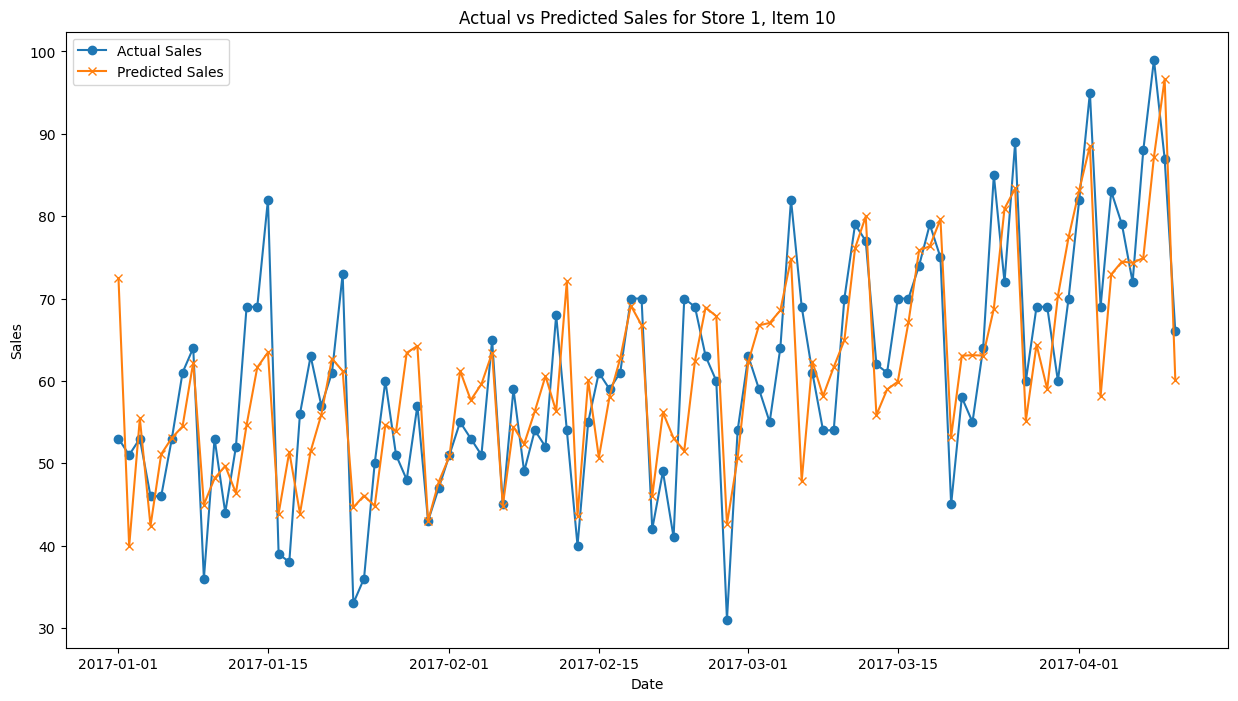

In [32]:
store_id = 1
item_id = 10

test_subset = test[(test['store'] == store_id) & (test['item'] == item_id)]

test_subset = test_subset.head(100)

X_test_subset = test_subset[features]
X_test_subset_scaled = scaler.transform(X_test_subset)
test_subset['predicted'] = model.predict(X_test_subset_scaled)

plt.figure(figsize=(15, 8))
plt.plot(test_subset['date'], test_subset['sales'], label='Actual Sales', marker='o')
plt.plot(test_subset['date'], test_subset['predicted'], label='Predicted Sales', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title(f'Actual vs Predicted Sales for Store {store_id}, Item {item_id}')
plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

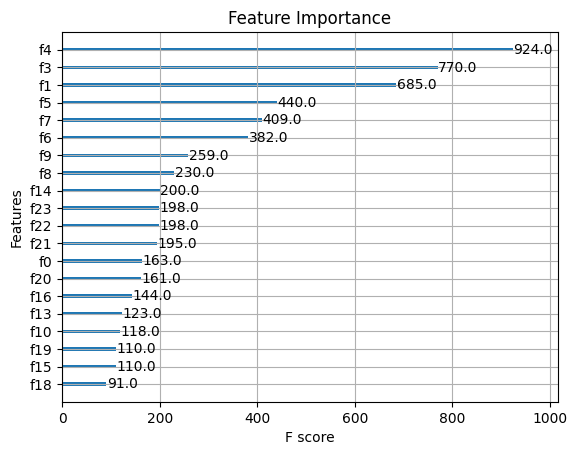

                Feature  Importance
4           sales_lag_7    0.761890
3           sales_lag_1    0.054929
21      day_of_week_cos    0.037734
5          sales_lag_15    0.035982
6          sales_lag_30    0.029272
23            month_cos    0.021247
22            month_sin    0.012970
20      day_of_week_sin    0.009196
7          sales_lag_45    0.007385
16    sales_roll_std_30    0.006608
9    sales_roll_mean_15    0.004244
8     sales_roll_mean_7    0.002444
19   sales_roll_std_365    0.002422
1                  item    0.002221
2                  year    0.001718
13  sales_roll_mean_365    0.001486
0                 store    0.001355
15    sales_roll_std_15    0.001199
14     sales_roll_std_7    0.001152
10   sales_roll_mean_30    0.001060
12  sales_roll_mean_180    0.000969
17    sales_roll_std_90    0.000883
18   sales_roll_std_180    0.000864
11   sales_roll_mean_90    0.000773


In [37]:
# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(model, importance_type='weight', max_num_features=20, title='Feature Importance')
plt.show()

# Retrieve feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

#ConvLSTM Model

**Feature Engineering**

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import ConvLSTM2D, Dense, Flatten, Dropout, Bidirectional, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf

warnings.filterwarnings('ignore')

data = pd.read_csv('/content/train.csv', parse_dates=['date'])
data['sales'] = data['sales'].astype(float)
data = data.sort_values(by='date')

def create_lag_features(df, lags, column_name='sales'):
    for lag in lags:
        df[f'{column_name}_lag_{lag}'] = df.groupby(['store', 'item'])[column_name].shift(lag)
    return df

lags = [1, 7, 14, 30, 45]
data = create_lag_features(data, lags)

data = data.dropna()

def calculate_trend(group):
    X = (group['date'] - group['date'].min()).dt.days.values.reshape(-1, 1)
    y = group['sales'].values
    model = LinearRegression().fit(X, y)
    return model.coef_[0]

sales_trend = data.groupby(['store', 'item']).apply(calculate_trend).reset_index().rename(columns={0: 'sales_trend'})
data = data.merge(sales_trend, on=['store', 'item'], how='left')

sales_volatility = data.groupby(['store', 'item'])['sales'].std().reset_index().rename(columns={'sales': 'sales_volatility'})
data = data.merge(sales_volatility, on=['store', 'item'], how='left')

**Preparing the data for training the model**

In [20]:
sales_scaler = MinMaxScaler()
data['sales'] = sales_scaler.fit_transform(data[['sales']])

scaler = MinMaxScaler()
numerical_cols = [f'sales_lag_{lag}' for lag in lags] + ['sales_trend', 'sales_volatility']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

split_date = '2017-01-01'
train_data = data[data['date'] < split_date]
val_data = data[data['date'] >= split_date]

features = ['sales'] + numerical_cols
train_pivoted = train_data.pivot_table(values=features, index=['store', 'item'], columns='date')
val_pivoted = val_data.pivot_table(values=features, index=['store', 'item'], columns='date')

train_pivoted = train_pivoted.fillna(0).values.reshape(len(train_data['store'].unique()), len(train_data['item'].unique()), -1)
val_pivoted = val_pivoted.fillna(0).values.reshape(len(val_data['store'].unique()), len(val_data['item'].unique()), -1)

def create_sequences(pivoted_data, sequence_length):
    num_dates = pivoted_data.shape[2]
    X, y = [], []
    for i in range(num_dates - sequence_length):
        sequence_X = pivoted_data[:, :, i:i+sequence_length]
        X.append(sequence_X.reshape(sequence_length, pivoted_data.shape[0], pivoted_data.shape[1], 1))
        next_day_y = pivoted_data[:, :, i+sequence_length]
        y.append(next_day_y)
    X = np.array(X)
    y = np.array(y)
    y = y.reshape(y.shape[0], -1)
    return X, y

**Training the model**

In [21]:
from keras.models import Sequential
from keras.layers import ConvLSTM2D, Dense, Flatten, Dropout, Bidirectional, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

sequence_length = 15

X_train, y_train = create_sequences(train_pivoted, sequence_length)
X_val, y_val = create_sequences(val_pivoted, sequence_length)

model = Sequential()
model.add(Bidirectional(ConvLSTM2D(filters=128, kernel_size=(1, 1), activation='relu', return_sequences=True, input_shape=(sequence_length, X_train.shape[1], X_train.shape[2], 1))))
model.add(BatchNormalization())
model.add(Bidirectional(ConvLSTM2D(filters=64, kernel_size=(1, 1), activation='relu')))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(X_train.shape[2] * X_train.shape[3]))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping])

y_val_pred = model.predict(X_val)
y_val_pred_inverse = sales_scaler.inverse_transform(y_val_pred.reshape(-1, 1)).reshape(y_val_pred.shape)
y_val_inverse = sales_scaler.inverse_transform(y_val.reshape(-1, 1)).reshape(y_val.shape)



Epoch 1/20
708/708 [==============================] - 274s 364ms/step - loss: 0.0091 - val_loss: 0.0058
Epoch 2/20
708/708 [==============================] - 253s 357ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 3/20
708/708 [==============================] - 257s 362ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 4/20
708/708 [==============================] - 253s 358ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 5/20
708/708 [==============================] - 252s 356ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 6/20
708/708 [==============================] - 252s 356ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 7/20
708/708 [==============================] - 252s 356ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/20
708/708 [==============================] - 253s 358ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 9/20
708/708 [==============================] - 257s 362ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 10/20
708/708 [==============================] - 256s 361m

**Predicting on the model**

In [22]:
from sklearn.metrics import mean_absolute_error

y_val_pred = model.predict(X_val)

print(f'Shape of y_val_pred: {y_val_pred.shape}')
print(f'Shape of y_val: {y_val.shape}')

y_val_pred_reshaped = y_val_pred.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)

y_val_pred_inverse = sales_scaler.inverse_transform(y_val_pred_reshaped).reshape(y_val_pred.shape)
y_val_inverse = sales_scaler.inverse_transform(y_val_reshaped).reshape(y_val.shape)

rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))
print(f'RMSE: {rmse}')

r2 = r2_score(y_val_inverse, y_val_pred_inverse)
print(f'R² score: {r2}')

mae=mean_absolute_error(y_val_inverse, y_val_pred_inverse)
print(f'MAE:{mae}')

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(y_val_inverse, y_val_pred_inverse)
print(f'SMAPE: {smape_value:.2f}%')

91/91 [==============================] - 17s 186ms/step
Shape of y_val_pred: (2905, 500)
Shape of y_val: (2905, 500)
RMSE: 7.482621619487932
R² score: 0.7717861793576767
MAE:5.300419097944266
SMAPE: 10.65%


**Plotting predicted v/s actual sales values**

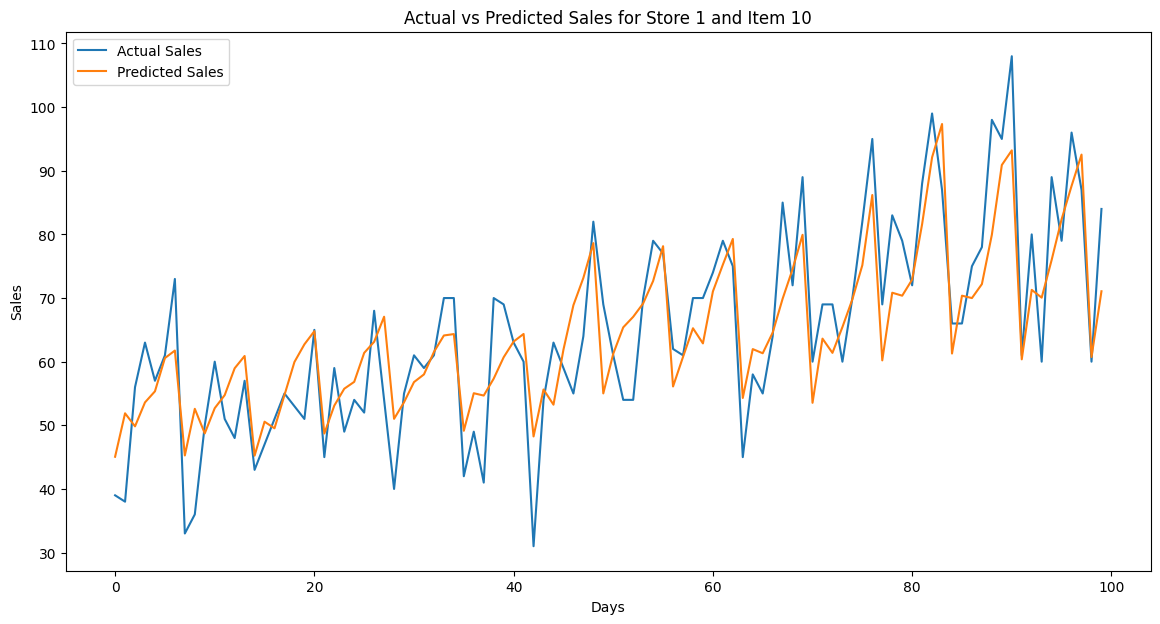

In [23]:
store_id = 1
item_id = 10

actual_sales = y_val_inverse[:, (store_id - 1) * len(data['item'].unique()) + (item_id - 1)]
predicted_sales = y_val_pred_inverse[:, (store_id - 1) * len(data['item'].unique()) + (item_id - 1)]

plt.figure(figsize=(14, 7))
plt.plot(actual_sales[:100], label='Actual Sales')
plt.plot(predicted_sales[:100], label='Predicted Sales')
plt.title(f'Actual vs Predicted Sales for Store {store_id} and Item {item_id}')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.show()